In [50]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
WHR = pd.read_csv("2021.csv")

In [31]:
WHR.head(10)

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338
5,Norway,7.392,11.053,0.954,73.3,0.960,0.093,0.270
6,Sweden,7.363,10.867,0.934,72.7,0.945,0.086,0.237
7,Luxembourg,7.324,11.647,0.908,72.6,0.907,-0.034,0.386
8,New Zealand,7.277,10.643,0.948,73.4,0.929,0.134,0.242
9,Austria,7.268,10.906,0.934,73.3,0.908,0.042,0.481


In [32]:
WHR.tail(10)

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
139,Burundi,3.775,6.635,0.490,53.400,0.626,-0.024,0.607
140,Yemen,3.658,7.578,0.832,57.122,0.602,-0.147,0.800
141,Tanzania,3.623,7.876,0.702,57.999,0.833,0.183,0.577
142,Haiti,3.615,7.477,0.540,55.700,0.593,0.422,0.721
143,Malawi,3.600,6.958,0.537,57.948,0.780,0.038,0.729
144,Lesotho,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
148,Afghanistan,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


In [52]:
WHR.shape

(149, 8)

In [34]:
print("There are {:,} rows ".format(WHR.shape[0]) + "and {} columns in our data".format(WHR.shape[1]))

There are 149 rows and 8 columns in our data


In [35]:
WHR.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Ladder score                  149 non-null    float64
 2   Logged GDP per capita         149 non-null    float64
 3   Social support                149 non-null    float64
 4   Healthy life expectancy       149 non-null    float64
 5   Freedom to make life choices  149 non-null    float64
 6   Generosity                    149 non-null    float64
 7   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.4+ KB


In [36]:
WHR.isnull().sum()

Country name                    0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [37]:
NULLS = WHR[WHR.isnull().any(axis=1)]

In [46]:
NULLS.head()

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [38]:
WHR.duplicated().sum()

0

In [39]:
WHR.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [53]:
WHR_Region = WHR.groupby('Country name')

In [54]:
WHR_Region['Ladder score'].describe().sort_values(by="mean",ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Country name,,,,,,,,
Afghanistan,1.0,2.523,NaN,2.523,2.523,2.523,2.523,2.523
Zimbabwe,1.0,3.145,NaN,3.145,3.145,3.145,3.145,3.145
Rwanda,1.0,3.415,NaN,3.415,3.415,3.415,3.415,3.415
Botswana,1.0,3.467,NaN,3.467,3.467,3.467,3.467,3.467
Lesotho,1.0,3.512,NaN,3.512,3.512,3.512,3.512,3.512
Malawi,1.0,3.600,NaN,3.600,3.600,3.600,3.600,3.600
Haiti,1.0,3.615,NaN,3.615,3.615,3.615,3.615,3.615
Tanzania,1.0,3.623,NaN,3.623,3.623,3.623,3.623,3.623
Yemen,1.0,3.658,NaN,3.658,3.658,3.658,3.658,3.658


In [55]:
WHR_Region['Ladder score'].describe().sort_values(by="mean",ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Country name,,,,,,,,
Finland,1.0,7.842,NaN,7.842,7.842,7.842,7.842,7.842
Denmark,1.0,7.620,NaN,7.620,7.620,7.620,7.620,7.620
Switzerland,1.0,7.571,NaN,7.571,7.571,7.571,7.571,7.571
Iceland,1.0,7.554,NaN,7.554,7.554,7.554,7.554,7.554
Netherlands,1.0,7.464,NaN,7.464,7.464,7.464,7.464,7.464
Norway,1.0,7.392,NaN,7.392,7.392,7.392,7.392,7.392
Sweden,1.0,7.363,NaN,7.363,7.363,7.363,7.363,7.363
Luxembourg,1.0,7.324,NaN,7.324,7.324,7.324,7.324,7.324
New Zealand,1.0,7.277,NaN,7.277,7.277,7.277,7.277,7.277


Text(0.5, 1.0, 'Happiness Score of the top 10 Countries')

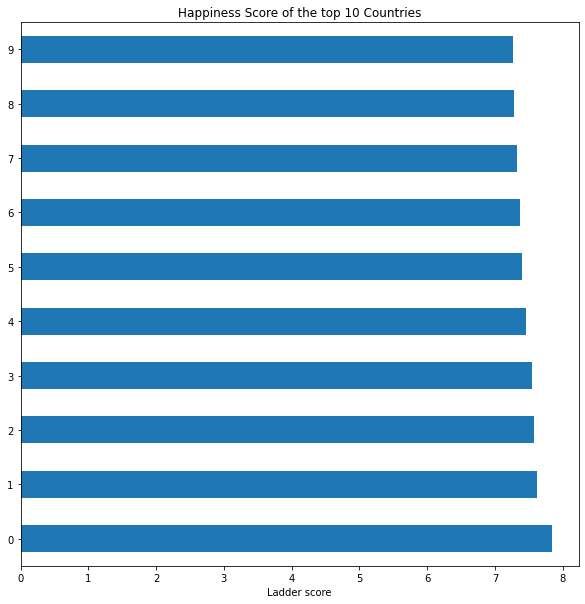

In [56]:

WHR['Ladder score'].head(10).plot(xticks=np.arange(9), kind='barh', figsize= (10, 10))
plt.xlabel("Ladder score")
plt.title('Happiness Score of the top 10 Countries')

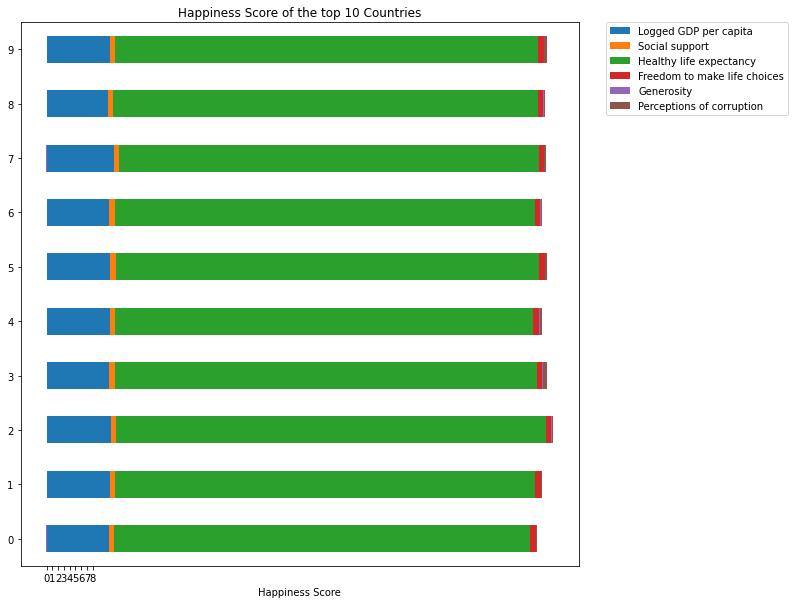

In [49]:
WHR[['Logged GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'Distribution of Social support')

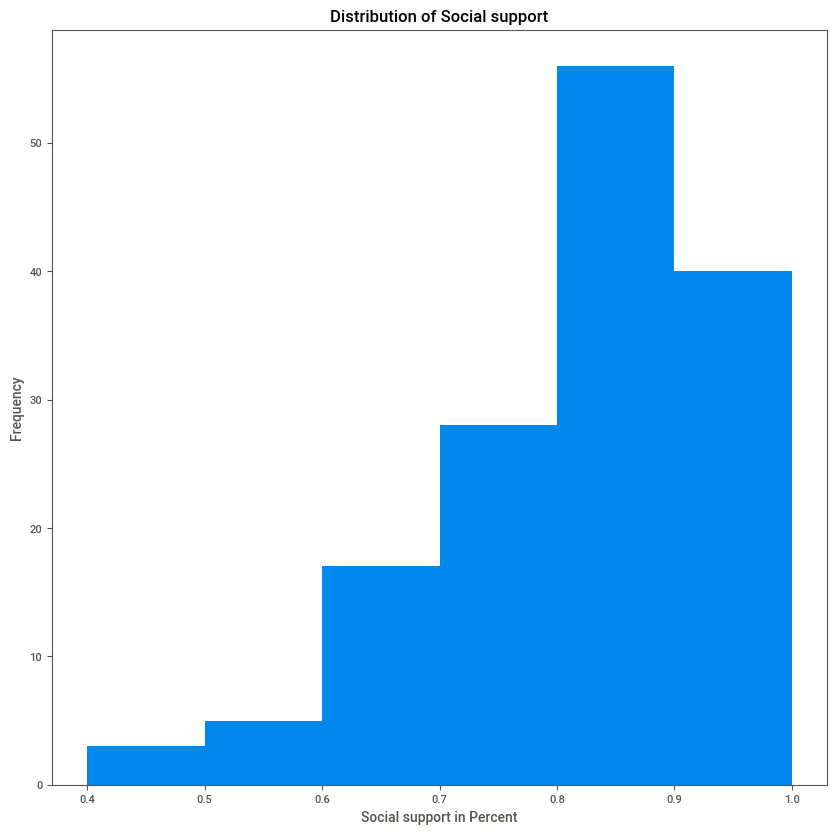

In [76]:
WHR['Social support'].plot(kind='hist', bins=[ 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00], figsize=(10,10))

plt.xlabel("Social support in Percent")
plt.title("Distribution of Social support")

C:\Users\tussh\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


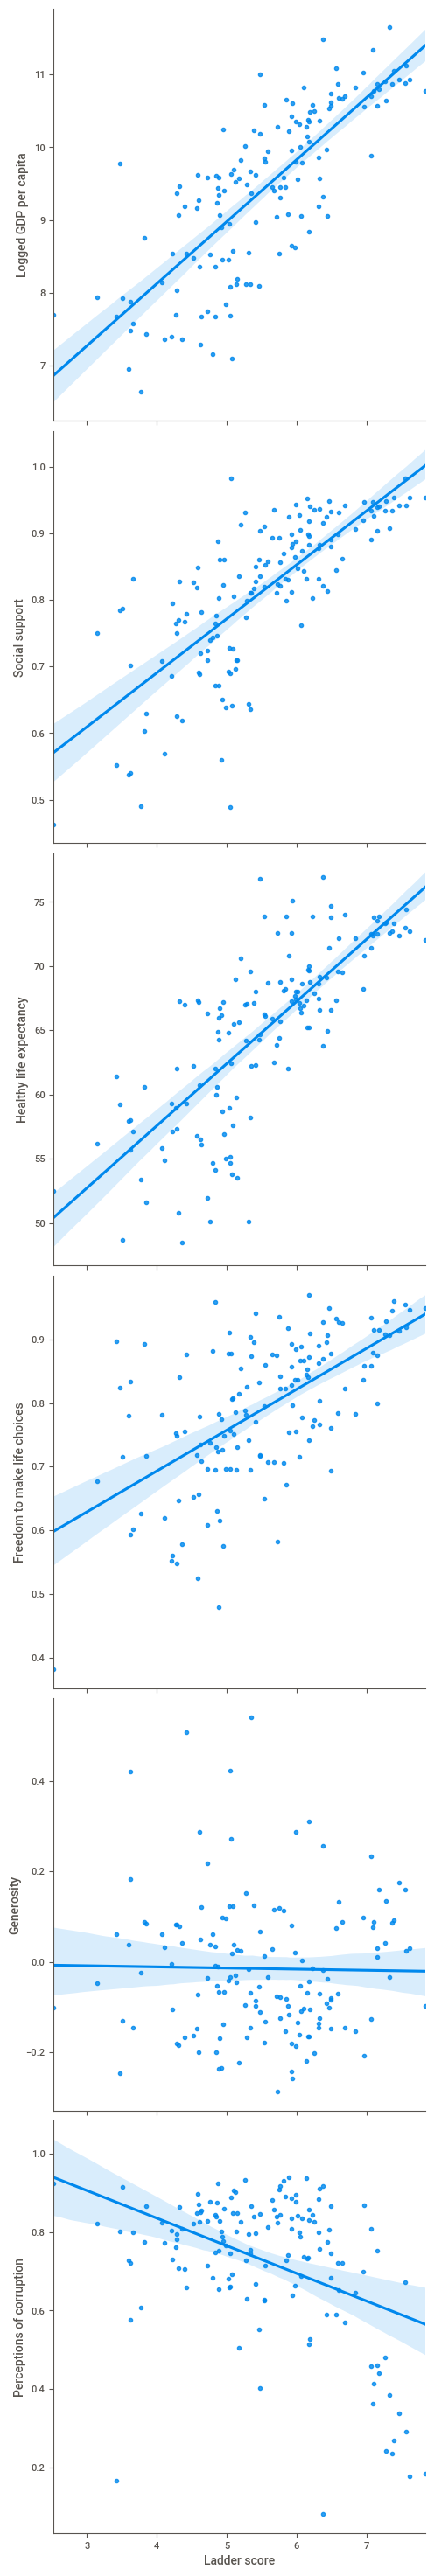

In [77]:
sns.pairplot(data=WHR, kind='reg', size = 5,
                  x_vars=['Ladder score'],
                  y_vars=['Logged GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])

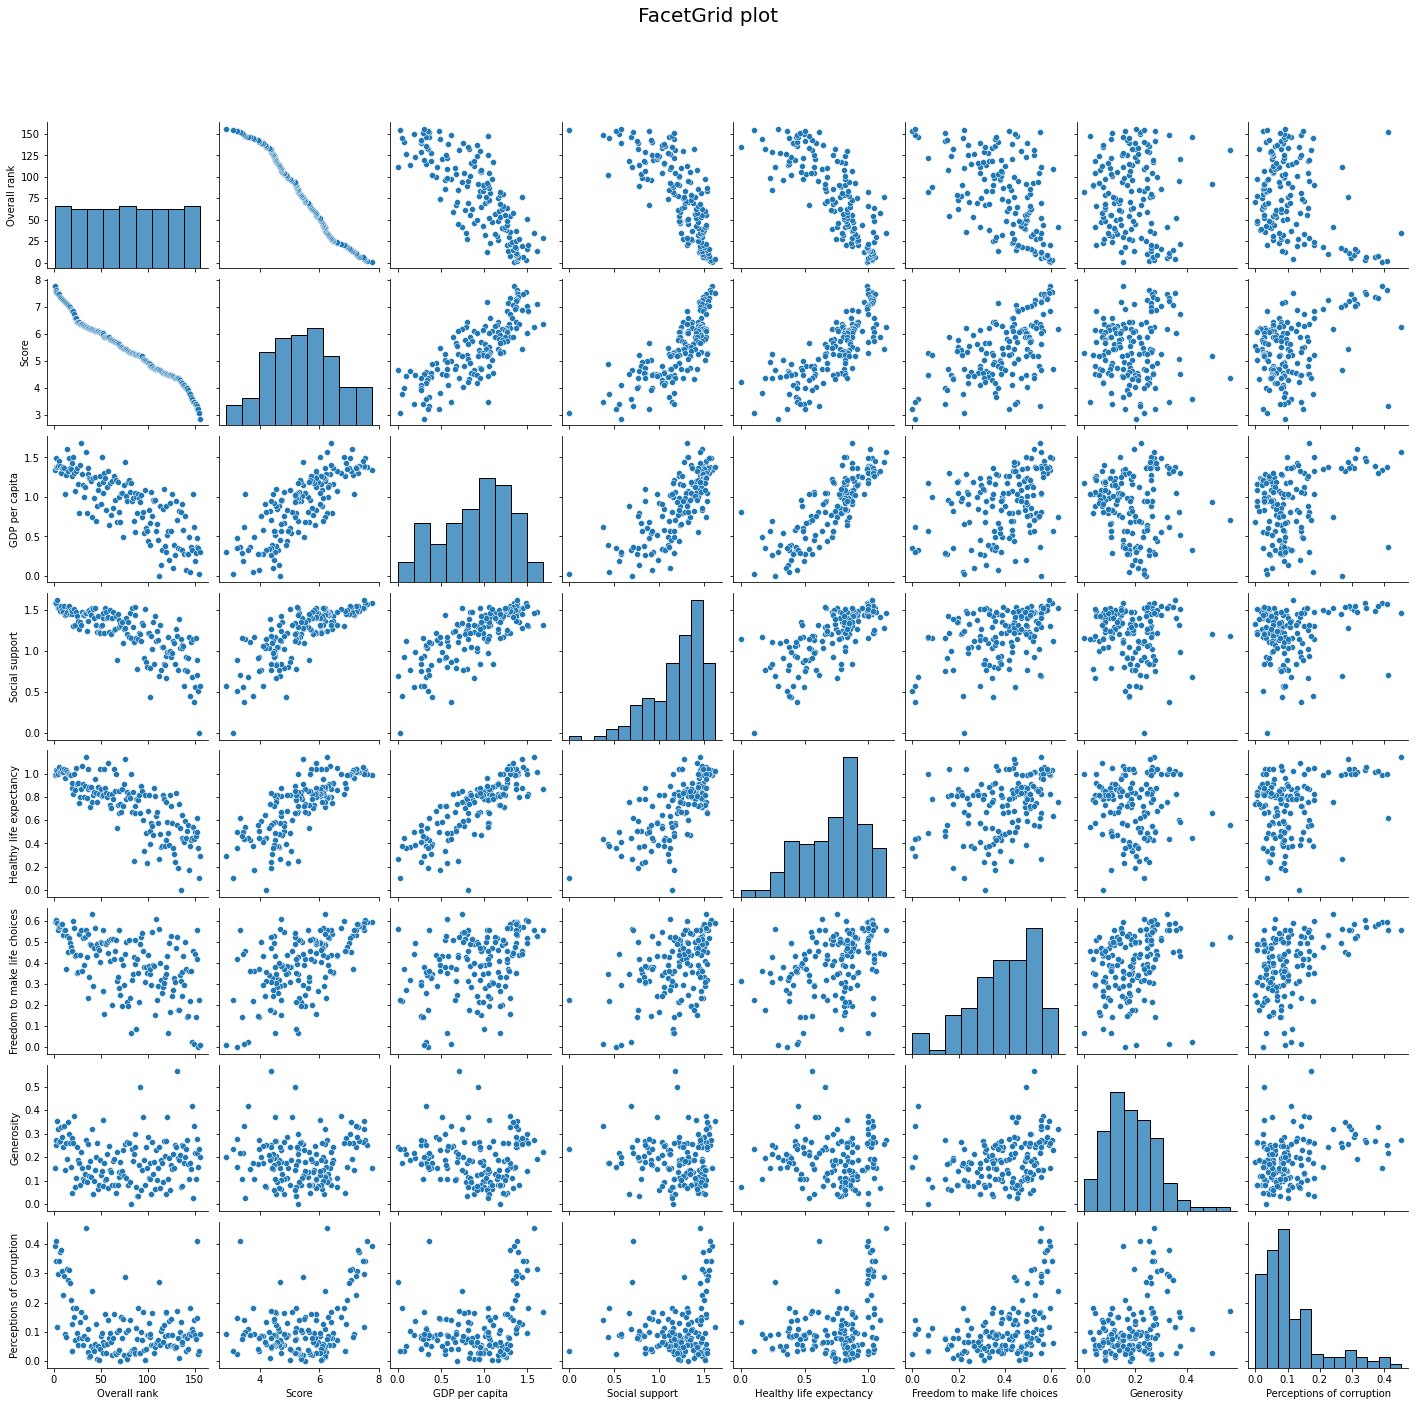

In [49]:
g = sns.pairplot(WHR)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

In [78]:
WHR.corr(method="pearson", min_periods=20)["Ladder score"].sort_values(ascending=False)

Ladder score                    1.000000
Logged GDP per capita           0.789760
Healthy life expectancy         0.768099
Social support                  0.756888
Freedom to make life choices    0.607753
Generosity                     -0.017799
Perceptions of corruption      -0.421140
Name: Ladder score, dtype: float64

In [79]:
WHR.corr(method="pearson", min_periods=20)["Ladder score"].abs().sort_values(ascending=False)

Ladder score                    1.000000
Logged GDP per capita           0.789760
Healthy life expectancy         0.768099
Social support                  0.756888
Freedom to make life choices    0.607753
Perceptions of corruption       0.421140
Generosity                      0.017799
Name: Ladder score, dtype: float64

In [80]:
WHR.corr(method="pearson", min_periods=20)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


<ipython-input-81-7176f7faceb5>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

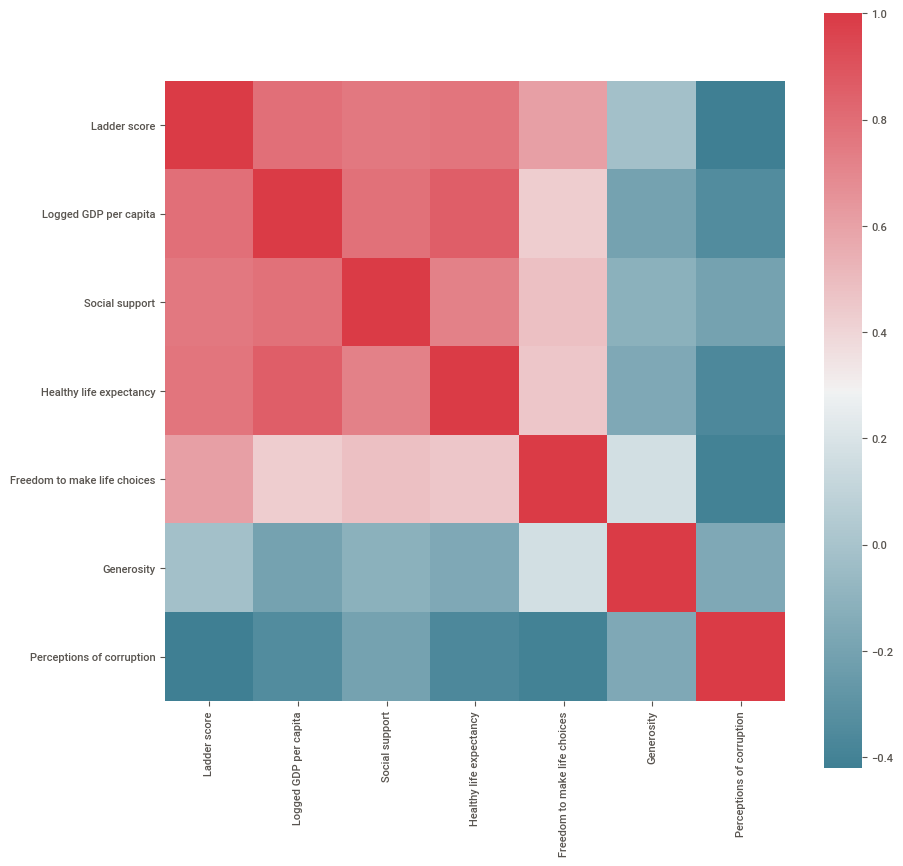

In [81]:
corr = WHR.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [82]:
WHR[WHR['Ladder score'] > 6].shape[0]

52

In [83]:
# Creating a list of attributes we want (just copy the column name)
econ_happiness = ['Ladder score','Logged GDP per capita']

# Creating a dataframe that only contains these attributes
econ_corr = WHR[econ_happiness]

# Finding correlation
econ_corr.corr()

,Ladder score,Logged GDP per capita
Ladder score,1.00000,0.78976
Logged GDP per capita,0.78976,1.00000


Text(0.5, 1.0, ' Correlation graph for Happiness score vs GDP')

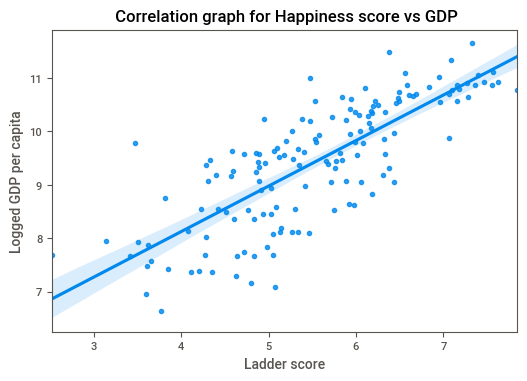

In [84]:
sns.regplot(data = econ_corr, x = 'Ladder score', y = 'Logged GDP per capita').set_title(" Correlation graph for Happiness score vs GDP")

In [85]:
#Health
health_happiness = ['Healthy life expectancy','Ladder score']

health_corr = WHR[health_happiness]

health_corr.corr()

,Healthy life expectancy,Ladder score
Healthy life expectancy,1.000000,0.768099
Ladder score,0.768099,1.000000


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Health')

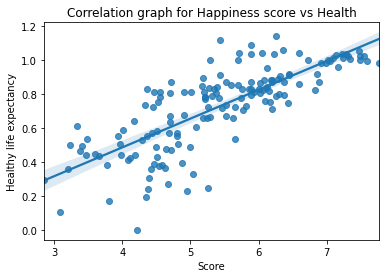

In [57]:
#health plot
sns.regplot(data = health_corr, x = 'Score', y = 'Healthy life expectancy').set_title("Correlation graph for Happiness score vs Health")

In [86]:
#Freedom
freedom_happiness = ['Freedom to make life choices', 'Ladder score']

freedom_corr = WHR[freedom_happiness]

freedom_corr.corr()

,Freedom to make life choices,Ladder score
Freedom to make life choices,1.000000,0.607753
Ladder score,0.607753,1.000000


Text(0.5, 1.0, ' Correlation graph for Happiness score vs Freedom')

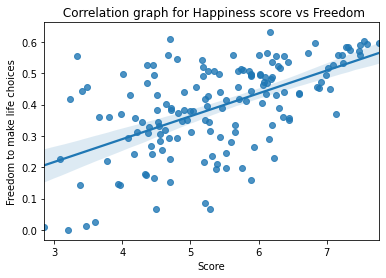

In [60]:
#Freedom Plot
sns.regplot(data = freedom_corr, x = 'Score', y = 'Freedom to make life choices').set_title(" Correlation graph for Happiness score vs Freedom")

In [87]:
#Trust (Gov. Corruption)
trust_happiness = ['Perceptions of corruption','Ladder score']

trust_corr = WHR[trust_happiness]

trust_corr.corr()

,Perceptions of corruption,Ladder score
Perceptions of corruption,1.00000,-0.42114
Ladder score,-0.42114,1.00000


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Gov. Corruption')

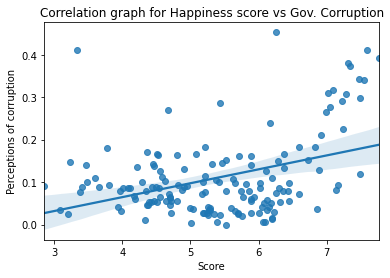

In [62]:

#Trust Plot
sns.regplot(data = trust_corr, x = 'Score', y = 'Perceptions of corruption').set_title("Correlation graph for Happiness score vs Gov. Corruption")

In [88]:

#Generosity
gen_happiness = ['Generosity','Ladder score']

gen_corr = WHR[gen_happiness]

gen_corr.corr()

,Generosity,Ladder score
Generosity,1.000000,-0.017799
Ladder score,-0.017799,1.000000


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Generosity')

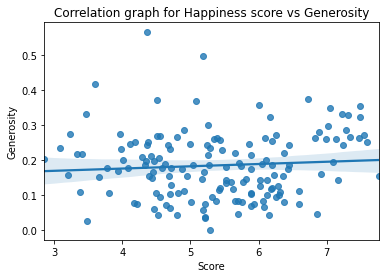

In [64]:
#Geneoristy Plot
sns.regplot(data = gen_corr, x = 'Score', y = 'Generosity').set_title("Correlation graph for Happiness score vs Generosity")

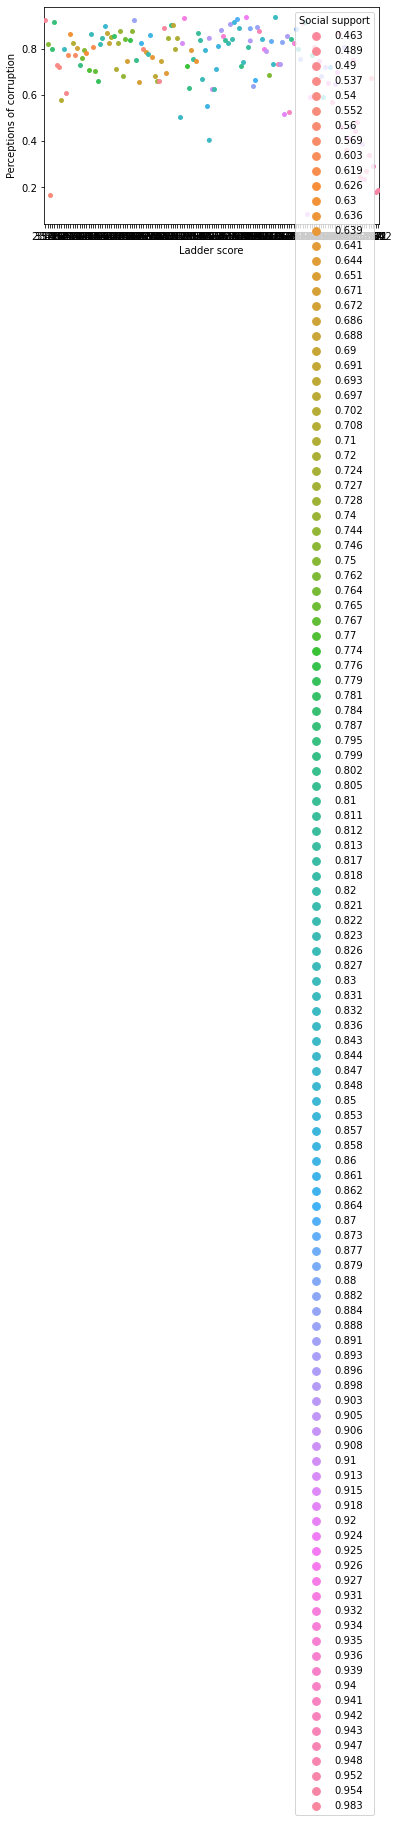

In [61]:
sns.swarmplot(x="Ladder score", y="Perceptions of corruption",hue="Social support", data=WHR)
plt.show()

In [62]:

WHR.columns

Index(['Country name', 'Ladder score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [90]:
WHR_30= WHR.iloc[:30,:] # first 20 rows of our data

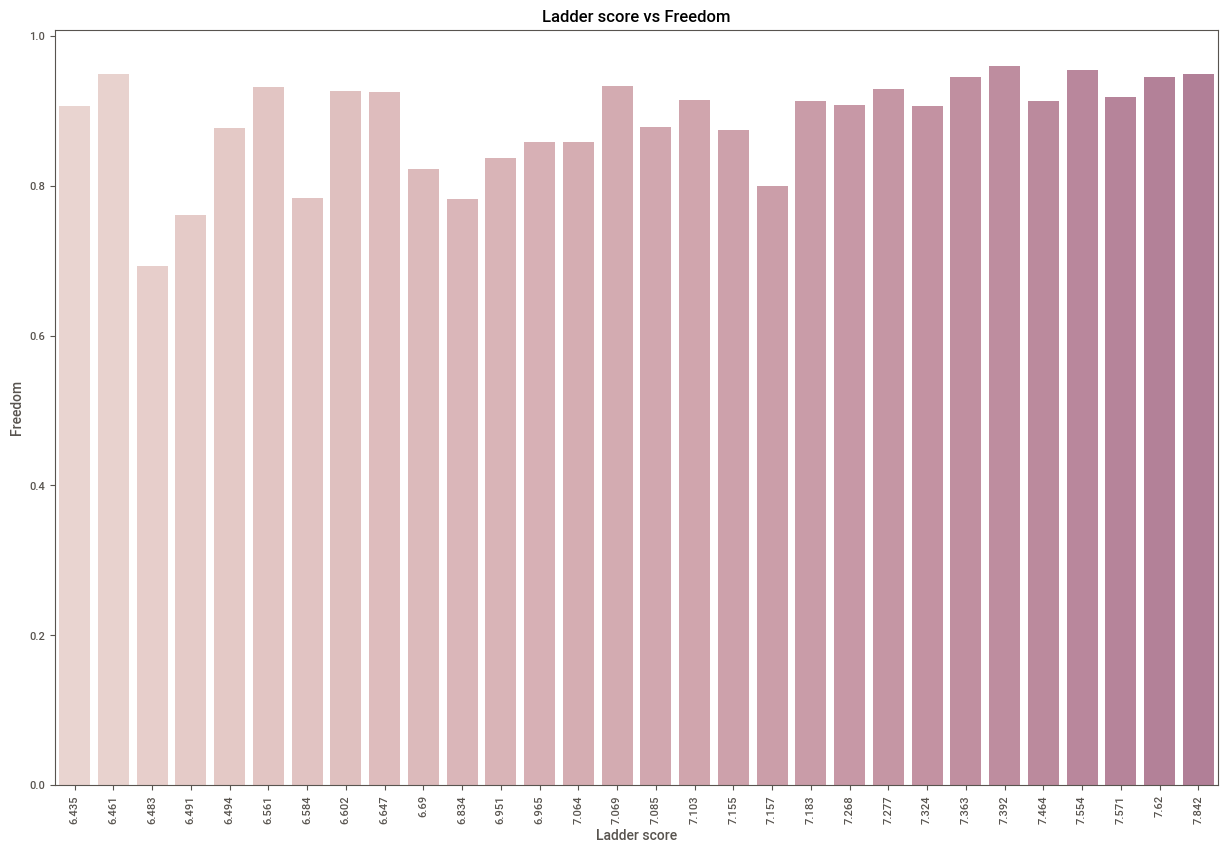

In [91]:
# visualization

plt.figure(figsize= (15,10))
sns.barplot(x = WHR_30['Ladder score'], y = WHR_70['Freedom to make life choices'], palette = sns.cubehelix_palette(70))
plt.xticks(rotation = 90) # slope of the words in the x axis 
plt.xlabel('Ladder score')
plt.ylabel('Freedom')
plt.title('Ladder score vs Freedom')
plt.show()

C:\Users\tussh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tussh\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


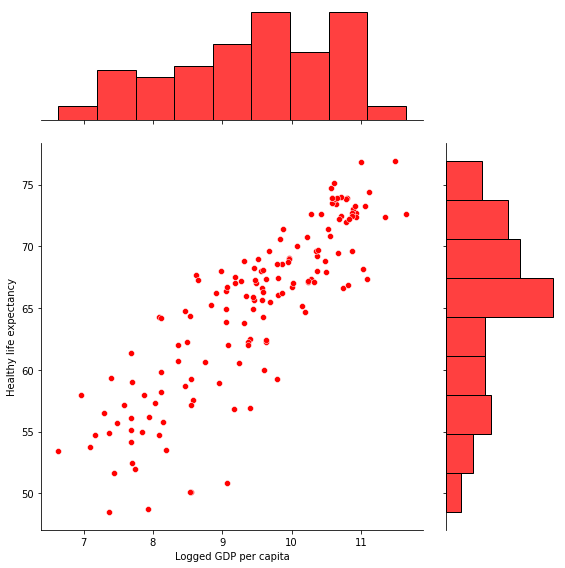

In [70]:
# we can select different kinds of joint plot
# kind= 'kde', 'scatter', 'reg', 'resit', 'hex' 
# ratio: ratio of the size of the scatter plot to the histogram plot
sns.jointplot(WHR['Logged GDP per capita'], WHR['Healthy life expectancy'], kind='scatter', size=8, ratio=3, color='r')
plt.show()

In [72]:
WHR_10= WHR.iloc[:10,:] 

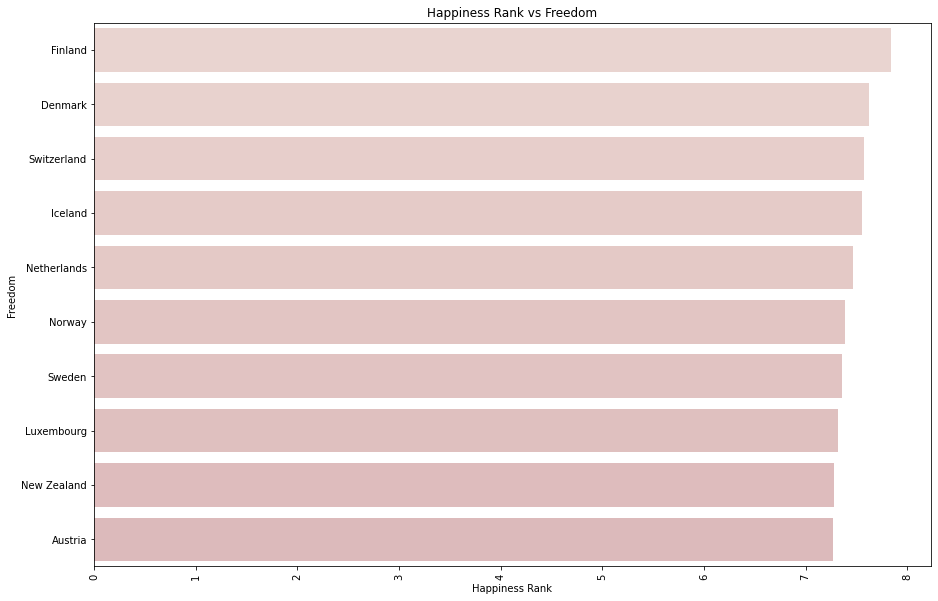

In [73]:
plt.figure(figsize= (15,10))
sns.barplot(x = WHR_10['Ladder score'], y = WHR_10['Country name'], palette = sns.cubehelix_palette(70))
plt.xticks(rotation = 90) # slope of the words in the x axis 
plt.xlabel('Happiness Rank')
plt.ylabel('Freedom')
plt.title('Happiness Rank vs Freedom')
plt.show()

In [74]:
import sweetviz as sv

report = sv.analyze(WHR)


                                             |                                             | [  0%]   00:00 ->…

In [75]:
report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
